## Random Forest


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

In [2]:
spotify = pd.read_csv('../Data/spotify_encoded.csv', index_col='track_id')
spotify.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
track_id,,,,,,,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,73,-0.004759,-0.309921,0.648283,-0.678397,-1.205833,0.350223,-1.306583,0.448128,-0.868312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4qPNDBW1i3p13qLCt0Ki3A,55,-0.692843,-0.309921,-0.781882,-1.818618,-1.205833,-1.616854,0.765355,-0.117369,1.756407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1iJBSr7s7jYXzM8EGcbK5b,57,-0.173180,-0.309921,-0.681324,-1.072643,-1.486792,-0.210138,0.765355,-0.292021,-0.345016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6lfxq3CG4xtTiEg7opyCyx,71,-0.248673,-0.309921,-1.642216,-2.229870,-1.486792,-1.856901,0.765355,-0.456498,1.700487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5vjLSffimiIP26QG5WcN2K,82,-0.274819,-0.309921,0.324261,-0.747970,-0.924873,-0.200198,0.765355,-0.318303,0.417265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = spotify.drop(['popularity'], axis=1)
y = spotify['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('Training Set Metrics:')
print(f'MSE: {mse_train:.4f}')
print(f'RMSE: {rmse_train:.4f}')
print(f'MAE: {mae_train:.4f}')
print(f'R2: {r2_train:.4f}')
print()

print('Testing Set Metrics:')
print(f'MSE: {mse_test:.4f}')
print(f'RMSE: {rmse_test:.4f}')
print(f'MAE: {mae_test:.4f}')
print(f'R2: {r2_test:.4f}')

Training Set Metrics:
MSE: 32.5081
RMSE: 5.7016
MAE: 3.8953
R2: 0.9141

Testing Set Metrics:
MSE: 234.1690
RMSE: 15.3026
MAE: 10.6761
R2: 0.3885


In [5]:
feat_importance = pd.DataFrame({'Feature Name':spotify.columns.drop('popularity'),'Importance':rf.feature_importances_})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)
feat_importance

,Feature Name,Importance
9,instrumentalness,0.063265
8,acousticness,0.057237
0,duration_ms,0.056795
7,speechiness,0.055873
5,loudness,0.055619
...,...,...
49,track_genre_forro,0.000210
103,track_genre_reggaeton,0.000173
77,track_genre_j-rock,0.000159
43,track_genre_dubstep,0.000139


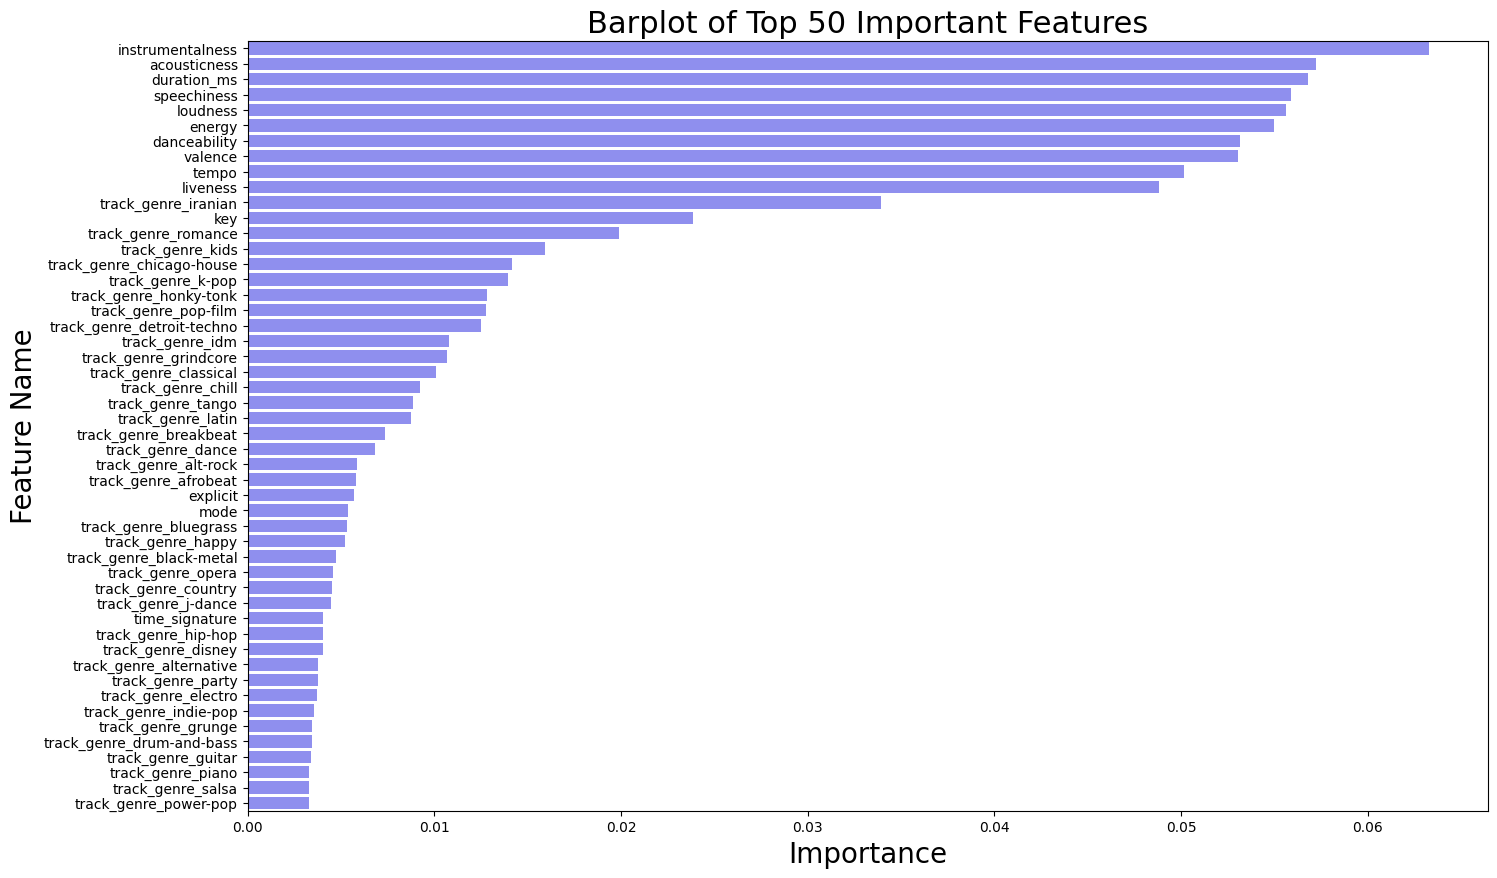

In [6]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x=feat_importance['Importance'][:50], y=feat_importance['Feature Name'][:50],color='blue', alpha=0.5)
ax.tick_params(labelsize=10)
ax.set_ylabel('Feature Name', fontsize = 20)
ax.set_xlabel('Importance', fontsize = 20)
ax.set_title('Barplot of Top 50 Important Features', fontsize=22)
plt.show()

In [7]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [8]:
rf = RandomForestRegressor(random_state=42)
scorer = make_scorer(r2_score)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, 
                                   verbose=1, random_state=42, n_jobs=-1, scoring=scorer)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/jessica/Library/Python/3.11/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
105 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fi

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42,
                   scoring=make_scorer(r2_score, response_method='predict'),
                   verbose=1)

In [12]:
print("Best Parameters:")
random_search.best_params_

Best Parameters:


{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [10]:
best_rf = random_search.best_estimator_

y_pred_train_best = best_rf.predict(X_train)
y_pred_test_best = best_rf.predict(X_test)

mse_train_best = mean_squared_error(y_train, y_pred_train_best)
rmse_train_best = np.sqrt(mse_train_best)
mae_train_best = mean_absolute_error(y_train, y_pred_train_best)
r2_train_best = r2_score(y_train, y_pred_train_best)

mse_test_best = mean_squared_error(y_test, y_pred_test_best)
rmse_test_best = np.sqrt(mse_test_best)
mae_test_best = mean_absolute_error(y_test, y_pred_test_best)
r2_test_best = r2_score(y_test, y_pred_test_best)

print('Best Model Training Set Metrics:')
print(f'MSE: {mse_train_best:.4f}')
print(f'RMSE: {rmse_train_best:.4f}')
print(f'MAE: {mae_train_best:.4f}')
print(f'R2: {r2_train_best:.4f}')
print()

print('Best Model Testing Set Metrics:')
print(f'MSE: {mse_test_best:.4f}')
print(f'RMSE: {rmse_test_best:.4f}')
print(f'MAE: {mae_test_best:.4f}')
print(f'R2: {r2_test_best:.4f}')

Best Model Training Set Metrics:
MSE: 110.5603
RMSE: 10.5148
MAE: 7.4086
R2: 0.7079

Best Model Testing Set Metrics:
MSE: 229.1546
RMSE: 15.1379
MAE: 10.7955
R2: 0.4016


In [13]:
estimator = RandomForestRegressor(random_state=42)

rfe_cv = RFECV(estimator=estimator, cv=5)

param_grid = {
    'n_estimators': [300, 400, 500],
    'max_features': ['sqrt'],
    'max_depth': [None, 30, 40, 50, 60],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [2, 4, 6],
    'bootstrap': [False]
}

pipeline = Pipeline([
    ('feature_selection', rfe_cv),
    ('model', GridSearchCV(estimator, param_grid, cv=5, scoring='r2', n_jobs=-1))
])

pipeline.fit(X_train, y_train)

/Users/jessica/Library/Python/3.11/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 RFECV(cv=5, estimator=RandomForestRegressor(random_state=42))),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=RandomForestRegressor(random_state=42),
                              n_jobs=-1,
                              param_grid={'bootstrap': [False],
                                          'max_depth': [None, 30, 40, 50, 60],
                                          'max_features': ['sqrt'],
                                          'min_samples_leaf': [2, 4, 6],
                                          'min_samples_split': [3, 5, 7],
                                          'n_estimators': [300, 400, 500]},
                              scoring='r2'))])

In [14]:
print("Best Parameters:")
pipeline.named_steps['model'].best_params_

Best Parameters:


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 500}

In [15]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('Training Set Metrics:')
print(f'MSE: {mse_train:.4f}')
print(f'RMSE: {rmse_train:.4f}')
print(f'MAE: {mae_train:.4f}')
print(f'R2: {r2_train:.4f}')
print()

print('Testing Set Metrics:')
print(f'MSE: {mse_test:.4f}')
print(f'RMSE: {rmse_test:.4f}')
print(f'MAE: {mae_test:.4f}')
print(f'R2: {r2_test:.4f}')

Training Set Metrics:
MSE: 60.9405
RMSE: 7.8064
MAE: 5.3930
R2: 0.8390

Testing Set Metrics:
MSE: 227.4625
RMSE: 15.0819
MAE: 10.6674
R2: 0.4060
